In [416]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)




In [417]:
df=pd.read_csv('./raw_data/t-1_raw_외감.csv',index_col=False,encoding='euc-kr')

- 부채비율: 60
- 당좌비율: 60
- 유동비율: 60
- 이자보상배율: 60
- OCF(천원): 58
- 이자비용(천원): 58
- 차입금의존도: 60
- 자기자본구성비율: 60
- 당기순이익(천원): 58
- 단기차입금(천원): 58
- 유동성장기부채(천원): 58
- 장기차입금(천원): 58
- 법인세비용차감전손익(백만원): 75
- 매출액영업이익률: 60
- 자기자본순이익률: 60
- 총자본순이익률: 60
- 매출액(천원): 58
- 총자본회전률:60
- 자기자본회전률: 60
- 운전자본회전률: 60
- 순운전자본회전률: 60
- 재고자산회전률: 60
- 당좌자산회전률: 60
- 유동자산회전률: 60
- 매출액증가율: 59
- 총자본증가율: 59
- 자기자본증가율: 59
- 순이익증가율: 59
- 유형자산증가율: 59
- 유동자산증가율: 59
- 재고자산증가율: 59
- 영업이익증가율: 59
- 총자본투자효율: 69
- 부가가치율: 69
- 노동소득분배율:  69
- 자본분배율: 69
- 이윤분배율: 69
- ICF(천원):  58
- FCF(천원):  58
- 자산총계(천원): 58
- 부채총계(천원): 58
- 자본총계(천원): 58
- 자본금(천원):  58
- 영업손익(천원): 58
- 연구개발비(천원): 58
- 자본잠식률: 67

In [418]:
df.dropna(subset='자산총계(천원)', axis=0, inplace=True)
df.dropna(subset='법인세비용차감전손익(백만원)', axis=0, inplace=True)
df.dropna(subset='부가가치율', axis=0, inplace=True)
df.dropna(subset='부채비율', axis=0, inplace=True)
df.dropna(subset='매출액영업이익률', axis=0, inplace=True)

In [419]:
df.drop('자본잠식률', axis=1, inplace=True)

- 결측치 대체가 아닌 실제 0값이므로 0 대입

In [420]:
df['감가상각비(백만원)'] = df['감가상각비(백만원)'].fillna(0)
df['금융비용(백만원)'] = df['금융비용(백만원)'].fillna(0)

In [421]:
df.isna().sum()

회사명                0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)           0
부채총계(천원)           0
자본총계(천원)     

In [422]:
df['파생이자보상배율'] = (df['OCF(천원)']/df['이자비용(천원)'])*100
df['부채상환계수'] = ((df['당기순이익(천원)']+(df['감가상각비(백만원)']*1000)+(df['금융비용(백만원)']*1000))/(df['단기차입금(천원)']+df['유동성장기부채(천원)']+(df['금융비용(백만원)']*1000)))*100
df['장기/EBITDA'] = (df['장기차입금(천원)']/((df['법인세비용차감전손익(백만원)']*1000)+(df['감가상각비(백만원)']*1000)+df['이자비용(천원)']))*100
df['금융대비매출액'] = ((df['금융비용(백만원)']*1000)/df['매출액(천원)'])*100
df['전체현금흐름(천원)'] = df['OCF(천원)']+df['ICF(천원)']+df['FCF(천원)']
df['연구개발비대비매출액'] = (df['연구개발비(천원)']/df['매출액(천원)'])*100
df['매출액대비현금흐름'] = df['전체현금흐름(천원)'] / df['매출액(천원)']
df['총자산대비현금흐름'] = df['전체현금흐름(천원)'] / df['자산총계(천원)']
df['총부채대비현금흐름'] = df['전체현금흐름(천원)'] / df['부채총계(천원)']
df['총자본대비현금흐름'] = df['전체현금흐름(천원)'] / df['자본총계(천원)']
df['총자산대비영업현금흐름'] = df['OCF(천원)'] / df['자산총계(천원)']
df['총자본대비영업현금흐름'] = df['OCF(천원)'] / df['자본총계(천원)']
df['총부채대비영업현금흐름'] = df['OCF(천원)'] / df['부채총계(천원)']

In [423]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    182043
1.0     13474
Name: count, dtype: int64

In [424]:
13474 / (182043 + 13474)

0.06891472352787738

In [425]:
# df[df['매출액(천원)']==0]['회사명'].unique()

In [426]:
df=df[~(df['매출액(천원)']==0.0)]

In [427]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    172693
1.0     12478
Name: count, dtype: int64

In [428]:
df.isna().sum()

회사명            0
거래소코드          0
회계년도           0
산업분류코드         0
부채비율           0
              ..
총부채대비현금흐름      0
총자본대비현금흐름      0
총자산대비영업현금흐름    0
총자본대비영업현금흐름    0
총부채대비영업현금흐름    0
Length: 67, dtype: int64

In [429]:
df[df['장기/EBITDA'].isna()]

,회사명,거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,금융대비매출액,전체현금흐름(천원),연구개발비대비매출액,매출액대비현금흐름,총자산대비현금흐름,총부채대비현금흐름,총자본대비현금흐름,총자산대비영업현금흐름,총자본대비영업현금흐름,총부채대비영업현금흐름
184393,신동은개발(주),96116,2019/12,68,91690.27,100.11,100.11,999999999.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184395,신동은개발(주),96116,2021/12,68,104666.67,100.10,100.10,999999999.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [430]:
df=df[~(df['장기/EBITDA'].isna()==True)]

In [431]:
df[df['이자비용(천원)']==0]['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    20143
1.0      928
Name: count, dtype: int64

In [432]:
df[df['이자비용(천원)']!=0]['이자비용(천원)'].describe()

count    1.640980e+05
mean     1.168103e+06
std      7.465181e+06
min      1.000000e+00
25%      1.193528e+05
50%      2.959515e+05
75%      6.839355e+05
max      5.937832e+08
Name: 이자비용(천원), dtype: float64

In [433]:
1.168103 * 1000000 *1000

1168103000.0

## 파생이자보상배율 inf 값들은 가장 큰 값으로 대체하는 코드

In [434]:
df['파생이자보상배율'].value_counts().sort_index(ascending=False)

파생이자보상배율
 inf             16087
 5.041194e+09        1
 2.320755e+09        1
 2.031809e+09        1
 1.958040e+09        1
                 ...  
-3.775044e+08        1
-3.802890e+08        1
-3.818653e+08        1
-7.982038e+08        1
-inf              4841
Name: count, Length: 162985, dtype: int64

In [435]:
df.loc[df['파생이자보상배율']==np.inf,'파생이자보상배율'] =  5.041194e+09
df.loc[df['파생이자보상배율']== -np.inf,'파생이자보상배율'] =  -7.982038e+08

In [436]:
for i in df.index :
    if (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '도입기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '성장기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] < 0) :
        df.loc[i,'기업수명주기'] = '성숙기'
    elif (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] > 0):
        df.loc[i,'기업수명주기'] = '쇠퇴기'
    else :
        df.loc[i,'기업수명주기'] = '수축기'

In [437]:
df.isna().sum()

회사명            0
거래소코드          0
회계년도           0
산업분류코드         0
부채비율           0
              ..
총자본대비현금흐름      0
총자산대비영업현금흐름    0
총자본대비영업현금흐름    0
총부채대비영업현금흐름    0
기업수명주기         0
Length: 68, dtype: int64

In [438]:
df['산업분류'].value_counts()

산업분류
제조업                                  75982
부동산업                                 25273
도매 및 소매업                             22224
건설업                                  17647
운수 및 창고업                              8831
정보통신업                                 7797
전문, 과학 및 기술 서비스업                      6171
사업시설 관리, 사업 지원 및 임대 서비스업              5612
숙박 및 음식점업                             3520
예술, 스포츠 및 여가관련 서비스업                   3390
수도, 하수 및 폐기물 처리, 원료 재생업               2333
전기, 가스, 증기 및 공기조절 공급업                 2040
협회 및 단체, 수리 및 기타 개인 서비스업              1326
농업, 임업 및 어업                            825
금융 및 보험업                               811
교육 서비스업                                727
광업                                     536
보건업 및 사회복지 서비스업                        111
공공 행정, 국방 및 사회보장 행정                     12
가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동        1
Name: count, dtype: int64

In [439]:
df=df[~(df['산업분류']=='가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동')]

In [440]:
df.loc[180602,'산업분류']='부동산업'

- 레이전트리 : 미지급 비용이 음수여서 부채 총계가 음수  --> 일반적이지 않으므로 삭제

In [441]:
df.drop(145674,axis=0,inplace=True)

In [442]:
# df[(df['산업분류']=='공공 행정, 국방 및 사회보장 행정')]

In [443]:
order =['회사명', '거래소코드', '회계년도', 'Year' ,'산업분류코드','산업분류', '부채비율', '당좌비율', '유동비율', '이자보상배율',
       'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율', '당기순이익(천원)', '감가상각비(백만원)',
       '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)', '장기차입금(천원)', '법인세비용차감전손익(백만원)',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률', '매출액(천원)', '총자본회전률', '자기자본회전률',
       '운전자본회전률', '순운전자본회전률', '재고자산회전률', '당좌자산회전률', '유동자산회전률', '매출액증가율',
       '총자본증가율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율',
       '영업이익증가율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)',
       'FCF(천원)', '자산총계(천원)', '부채총계(천원)', '자본총계(천원)',  '자본금(천원)',
       '영업손익(천원)', '연구개발비(천원)', '파생이자보상배율', '부채상환계수',
       '장기/EBITDA', '금융대비매출액', '전체현금흐름(천원)', '연구개발비대비매출액', '매출액대비현금흐름',
       '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름', '총자본대비영업현금흐름',
       '총부채대비영업현금흐름', '기업수명주기', 't-1감사의견코드']

In [444]:
df = df.reindex(columns=order)

In [445]:
df.shape

(185167, 68)

---
- train-test split (2.3 / 7.7)

In [446]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df.drop('t-1감사의견코드',axis=1),df['t-1감사의견코드'],test_size=0.23,stratify=df['t-1감사의견코드']) 

In [447]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


142578
42589
142578
42589


In [448]:
y_train.value_counts()

t-1감사의견코드
0.0    132971
1.0      9607
Name: count, dtype: int64

In [449]:
y_test.value_counts()

t-1감사의견코드
0.0    39719
1.0     2870
Name: count, dtype: int64

### X_trian에 대한 윈져라이징

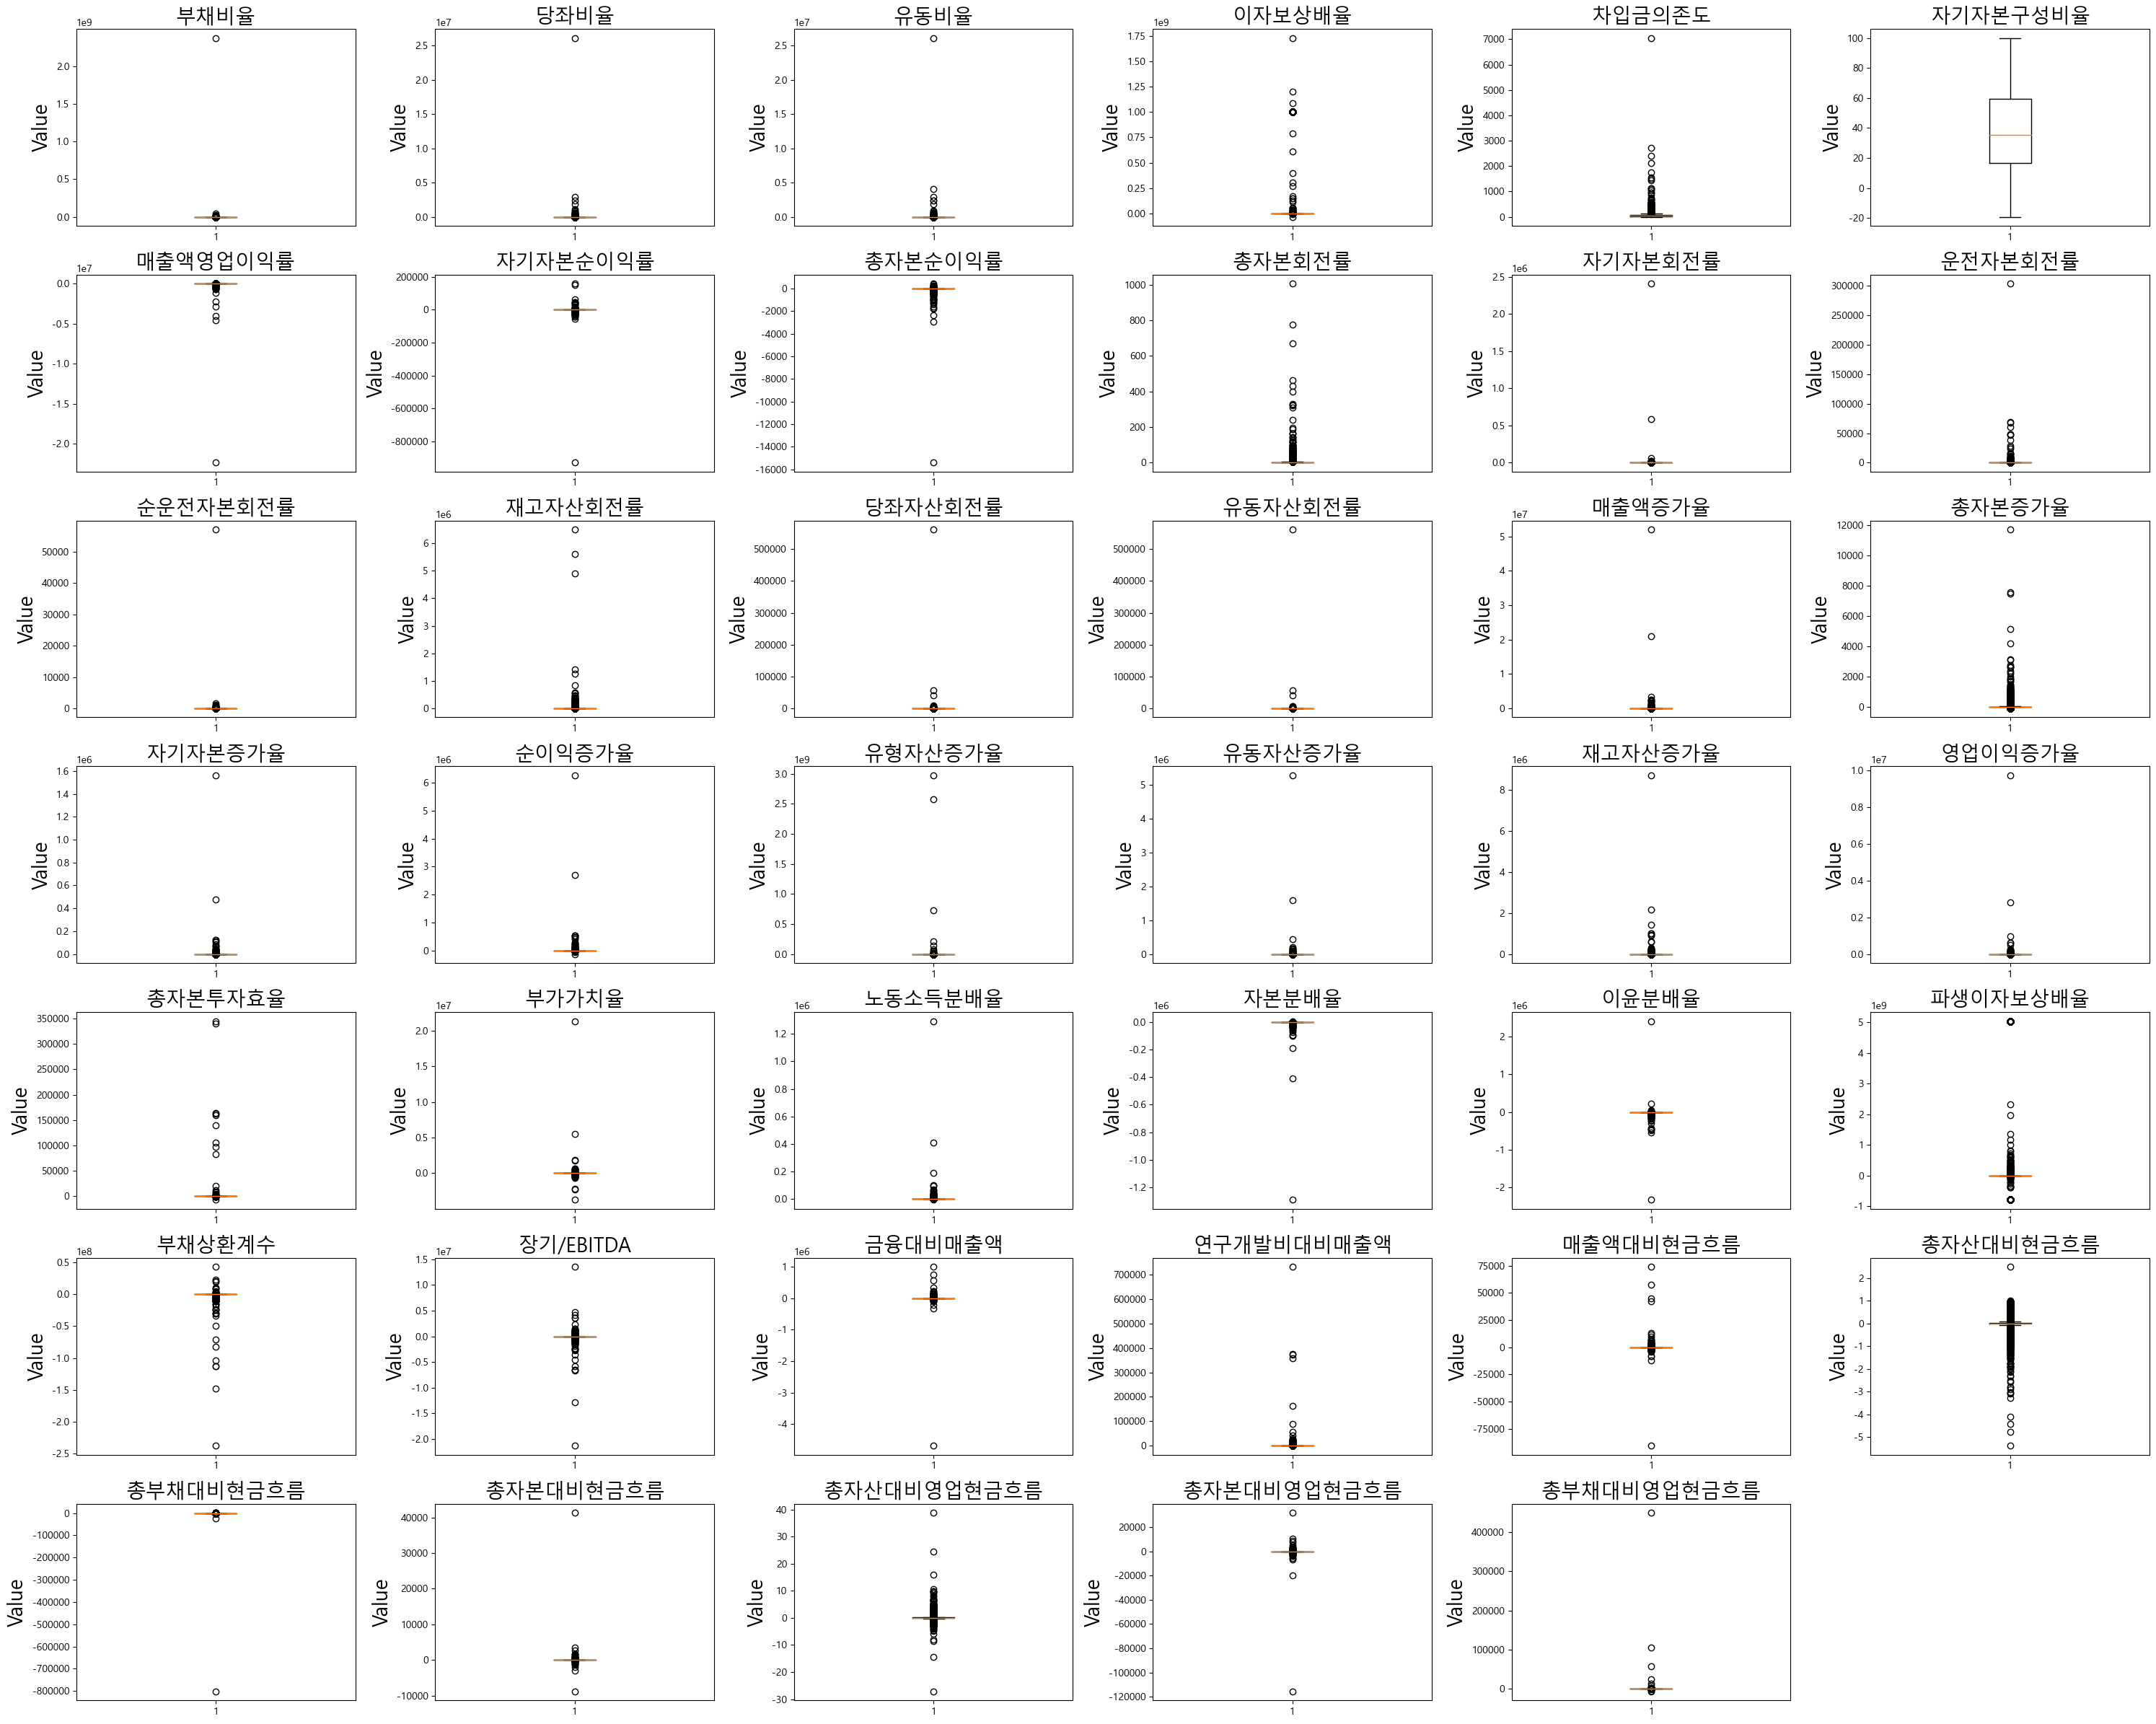

In [450]:
import matplotlib.pyplot as plt

columns=[ '부채비율', '당좌비율','유동비율', '이자보상배율', '차입금의존도', '자기자본구성비율',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율','파생이자보상배율',
       '부채상환계수', '장기/EBITDA', '금융대비매출액', '연구개발비대비매출액',
       '매출액대비현금흐름', '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름',
       '총자본대비영업현금흐름', '총부채대비영업현금흐름']

# subplots로 boxplot 출력 (4행 9열로 서브플롯 그리기)
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(30, 24))

# 36개의 컬럼에 대한 boxplot 그리기
for i, col in enumerate(columns):
    ax = axes[i // 6, i % 6]
    ax.boxplot(X_train[col].dropna())
    ax.set_title(col, fontsize=20)  # 글씨 크기 설정
    ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# 남은 서브플롯 삭제
for j in range(len(columns), 7 * 6):
    fig.delaxes(axes[j // 6, j % 6])

plt.tight_layout()
plt.show()


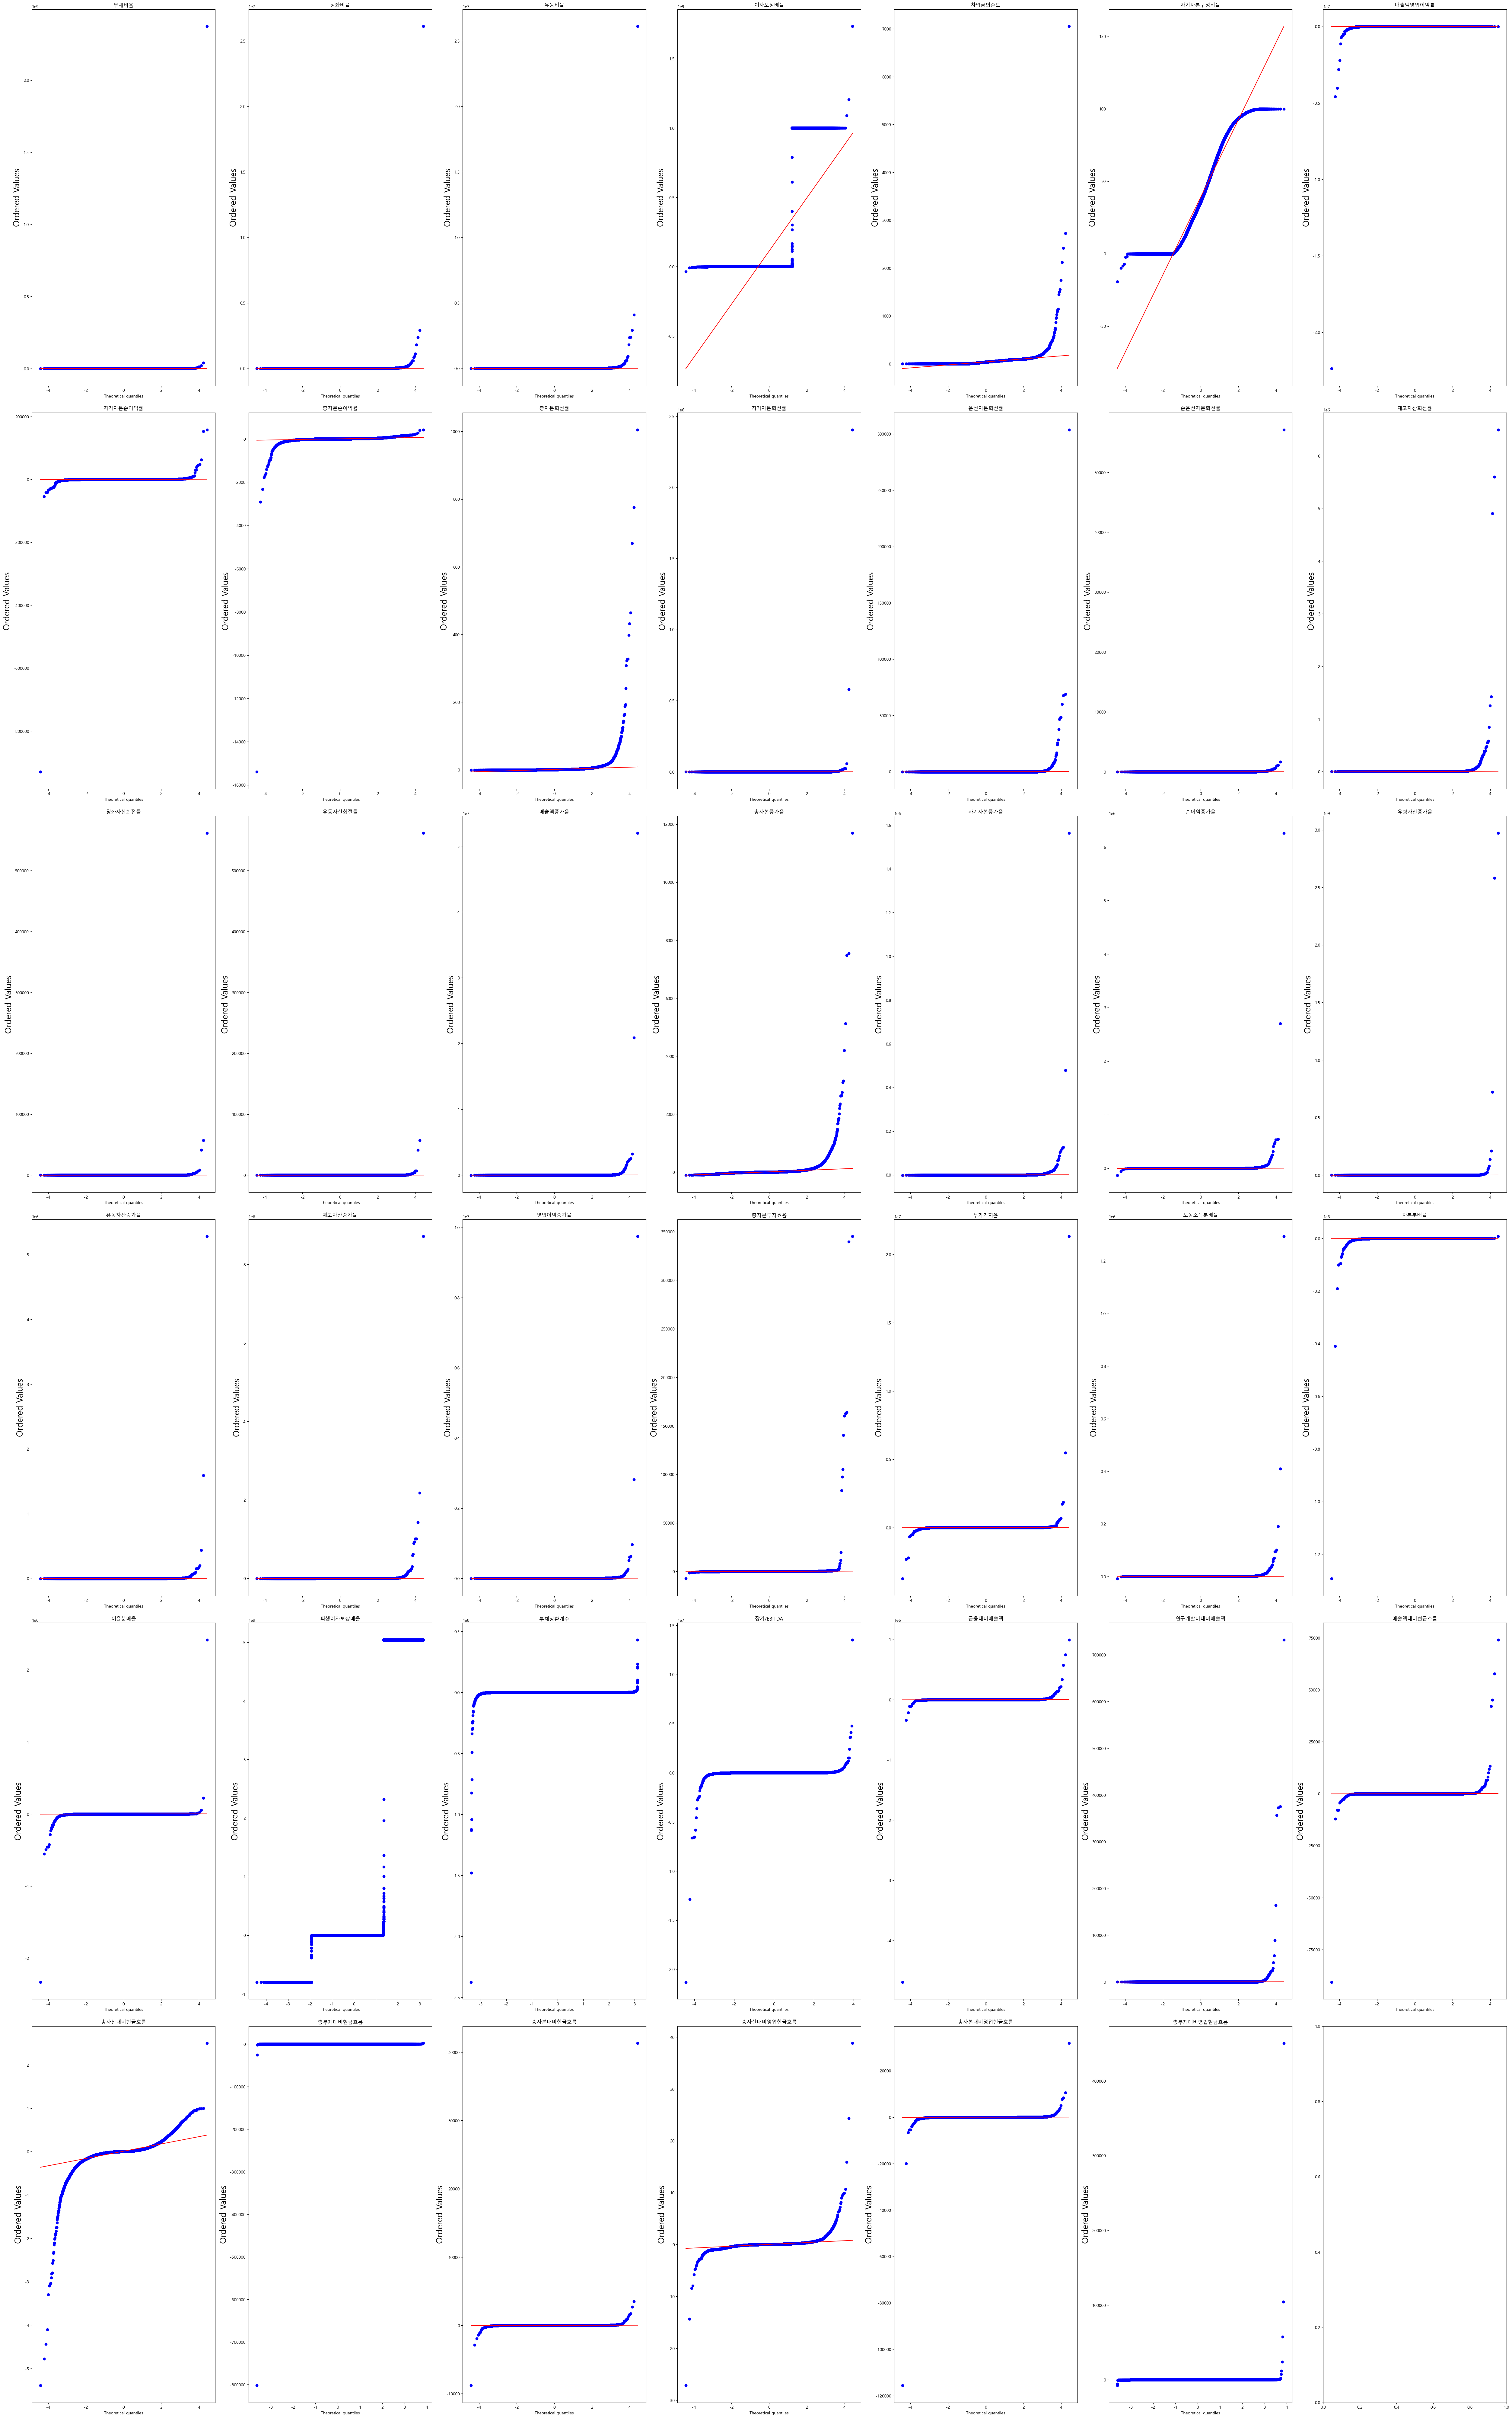

In [451]:
from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            ax.set_title(col, fontsize=20)  # 글씨 크기 설정
            ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(X_train[columns],7,6)

In [452]:
from scipy.stats.mstats import winsorize

X_train['부채비율'] = winsorize(X_train['부채비율'], limits= (0, 0.01))
X_train['당좌비율'] = winsorize(X_train['당좌비율'], limits= (0, 0.01))
X_train['유동비율'] = winsorize(X_train['유동비율'], limits= (0, 0.01))
X_train['이자보상배율'] = winsorize(X_train['이자보상배율'], limits= (0, 0.01))
X_train['차입금의존도'] = winsorize(X_train['차입금의존도'], limits= (0, 0.01))
X_train['매출액영업이익률'] = winsorize(X_train['매출액영업이익률'], limits= (0.01, 0))
X_train['자기자본순이익률'] = winsorize(X_train['자기자본순이익률'], limits= (0.08, 0.002))
X_train['총자본순이익률'] = winsorize(X_train['총자본순이익률'], limits= (0.01, 0))
X_train['총자본회전률'] = winsorize(X_train['총자본회전률'], limits= (0, 0.01))
X_train['자기자본회전률'] = winsorize(X_train['자기자본회전률'], limits= (0, 0.01))
X_train['운전자본회전률'] = winsorize(X_train['운전자본회전률'], limits= (0, 0.01))
X_train['순운전자본회전률'] = winsorize(X_train['순운전자본회전률'], limits= (0, 0.01))
X_train['재고자산회전률'] = winsorize(X_train['재고자산회전률'], limits= (0, 0.01))

X_train['당좌자산회전률'] = winsorize(X_train['당좌자산회전률'], limits= (0, 0.01))
X_train['유동자산회전률'] = winsorize(X_train['유동자산회전률'], limits= (0, 0.01))
X_train['매출액증가율'] = winsorize(X_train['매출액증가율'], limits= (0, 0.01))
X_train['총자본증가율'] = winsorize(X_train['총자본증가율'], limits= (0, 0.01))
X_train['자기자본증가율'] = winsorize(X_train['자기자본증가율'], limits= (0, 0.01))
X_train['순이익증가율'] = winsorize(X_train['순이익증가율'], limits= (0, 0.01))
X_train['유형자산증가율'] = winsorize(X_train['유형자산증가율'], limits= (0, 0.01))
X_train['유동자산증가율'] = winsorize(X_train['유동자산증가율'], limits= (0, 0.01))
X_train['재고자산증가율'] = winsorize(X_train['재고자산증가율'], limits= (0, 0.01))
X_train['영업이익증가율'] = winsorize(X_train['영업이익증가율'], limits= (0, 0.01))

X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.001, 0.009))
X_train['부가가치율'] = winsorize(X_train['부가가치율'], limits= (0.001, 0.009))
X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.008, 0.002))
X_train['노동소득분배율'] = winsorize(X_train['노동소득분배율'], limits= (0, 0.01))
X_train['자본분배율'] = winsorize(X_train['자본분배율'], limits= (0.01, 0))
X_train['이윤분배율'] = winsorize(X_train['이윤분배율'], limits= (0.009, 0.001))
X_train['파생이자보상배율'] = winsorize(X_train['파생이자보상배율'], limits= (0.003, 0.007))

X_train['부채상환계수'] = winsorize(X_train['부채상환계수'], limits= (0.006, 0.004))
X_train['장기/EBITDA'] = winsorize(X_train['장기/EBITDA'], limits= (0.005, 0.005))
X_train['금융대비매출액'] = winsorize(X_train['금융대비매출액'], limits= (0.004, 0.006))
X_train['연구개발비대비매출액'] = winsorize(X_train['연구개발비대비매출액'], limits= (0, 0.01))
X_train['매출액대비현금흐름'] = winsorize(X_train['매출액대비현금흐름'], limits= (0.005, 0.005))
X_train['총자산대비현금흐름'] = winsorize(X_train['총자산대비현금흐름'], limits= (0.006, 0.004))
# X_train['총부채대비현금흐름'] = winsorize(X_train['총부채대비현금흐름'], limits= (0.007, 0.003))
X_train['총자본대비현금흐름'] = winsorize(X_train['총자본대비현금흐름'], limits= (0.005, 0.005))
X_train['총자본대비영업현금흐름'] = winsorize(X_train['총자본대비영업현금흐름'], limits= (0.004, 0.006))
# X_train['총자산대비영업현금흐름'] = winsorize(X_train['총자산대비영업현금흐름'], limits= (0.00, 0.006))
X_train['총부채대비영업현금흐름'] = winsorize(X_train['총부채대비영업현금흐름'], limits= (0.002, 0.008))


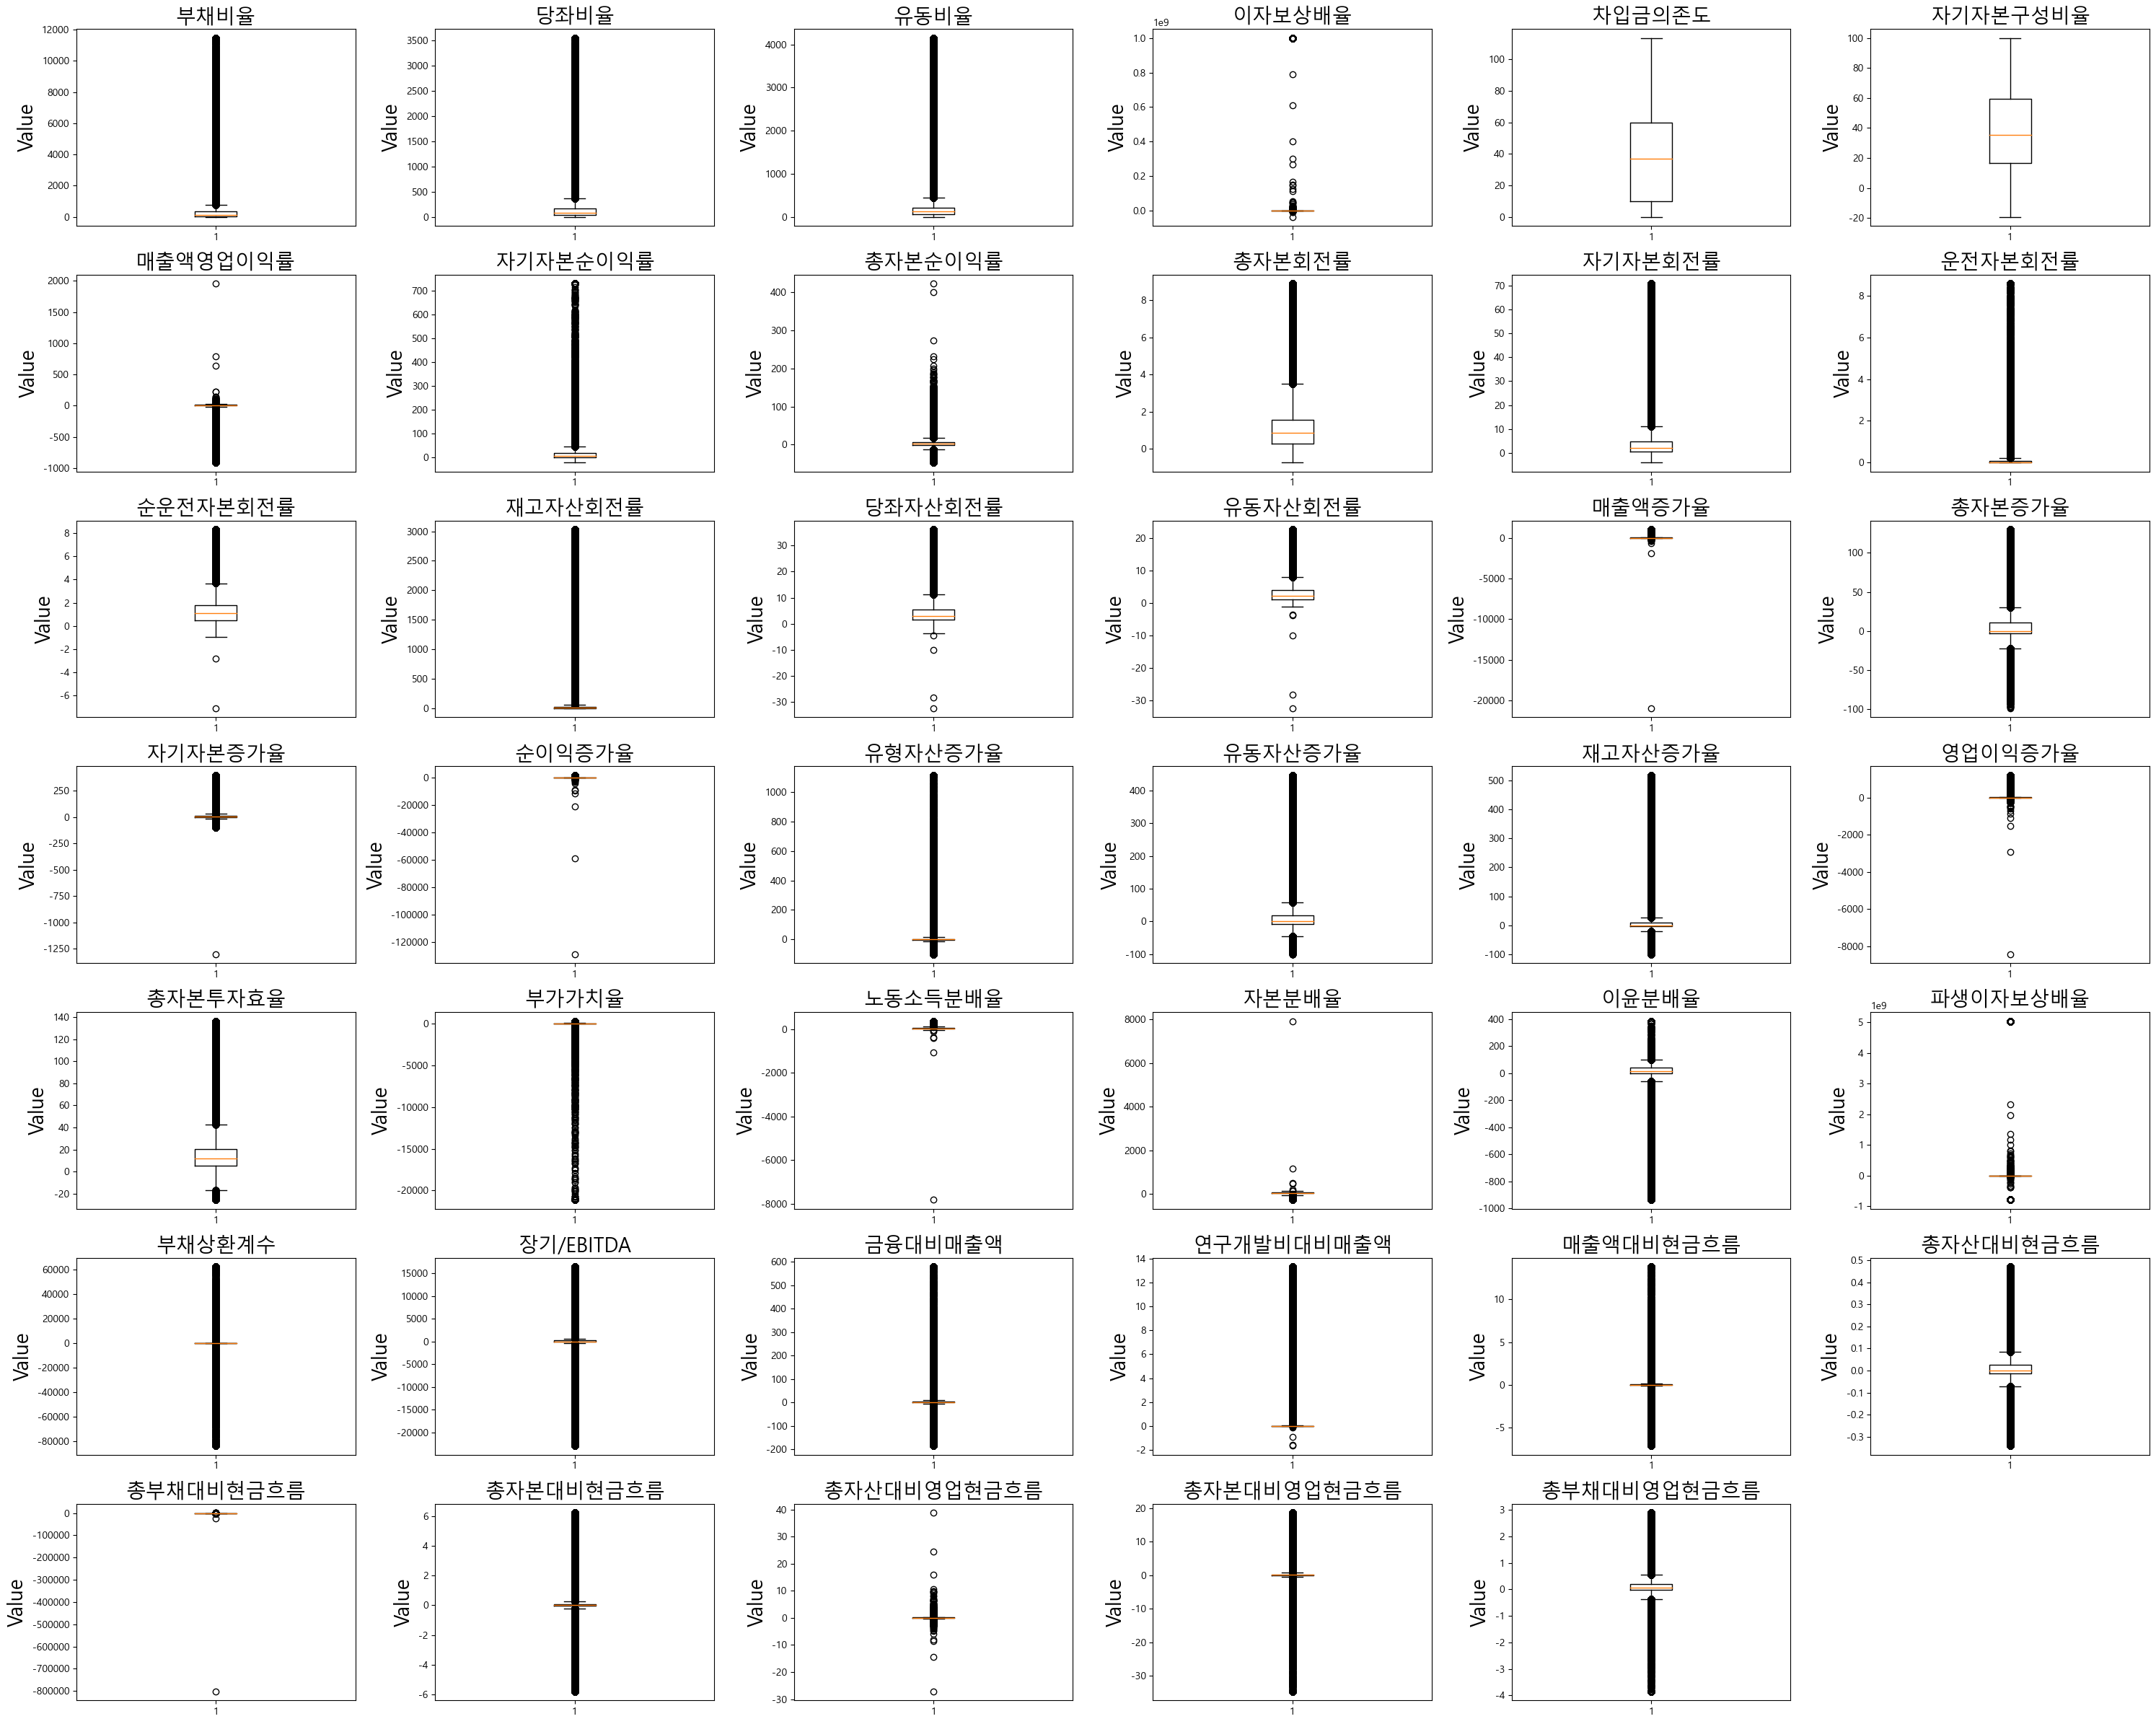

In [456]:
import matplotlib.pyplot as plt

columns=[ '부채비율', '당좌비율','유동비율', '이자보상배율', '차입금의존도', '자기자본구성비율',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율','파생이자보상배율',
       '부채상환계수', '장기/EBITDA', '금융대비매출액', '연구개발비대비매출액',
       '매출액대비현금흐름', '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름',
       '총자본대비영업현금흐름', '총부채대비영업현금흐름']

# subplots로 boxplot 출력 (4행 9열로 서브플롯 그리기)
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(30, 24))

# 36개의 컬럼에 대한 boxplot 그리기
for i, col in enumerate(columns):
    ax = axes[i // 6, i % 6]
    ax.boxplot(X_train[col].dropna())
    ax.set_title(col, fontsize=20)  # 글씨 크기 설정
    ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# 남은 서브플롯 삭제
for j in range(len(columns), 7 * 6):
    fig.delaxes(axes[j // 6, j % 6])

plt.tight_layout()
plt.show()


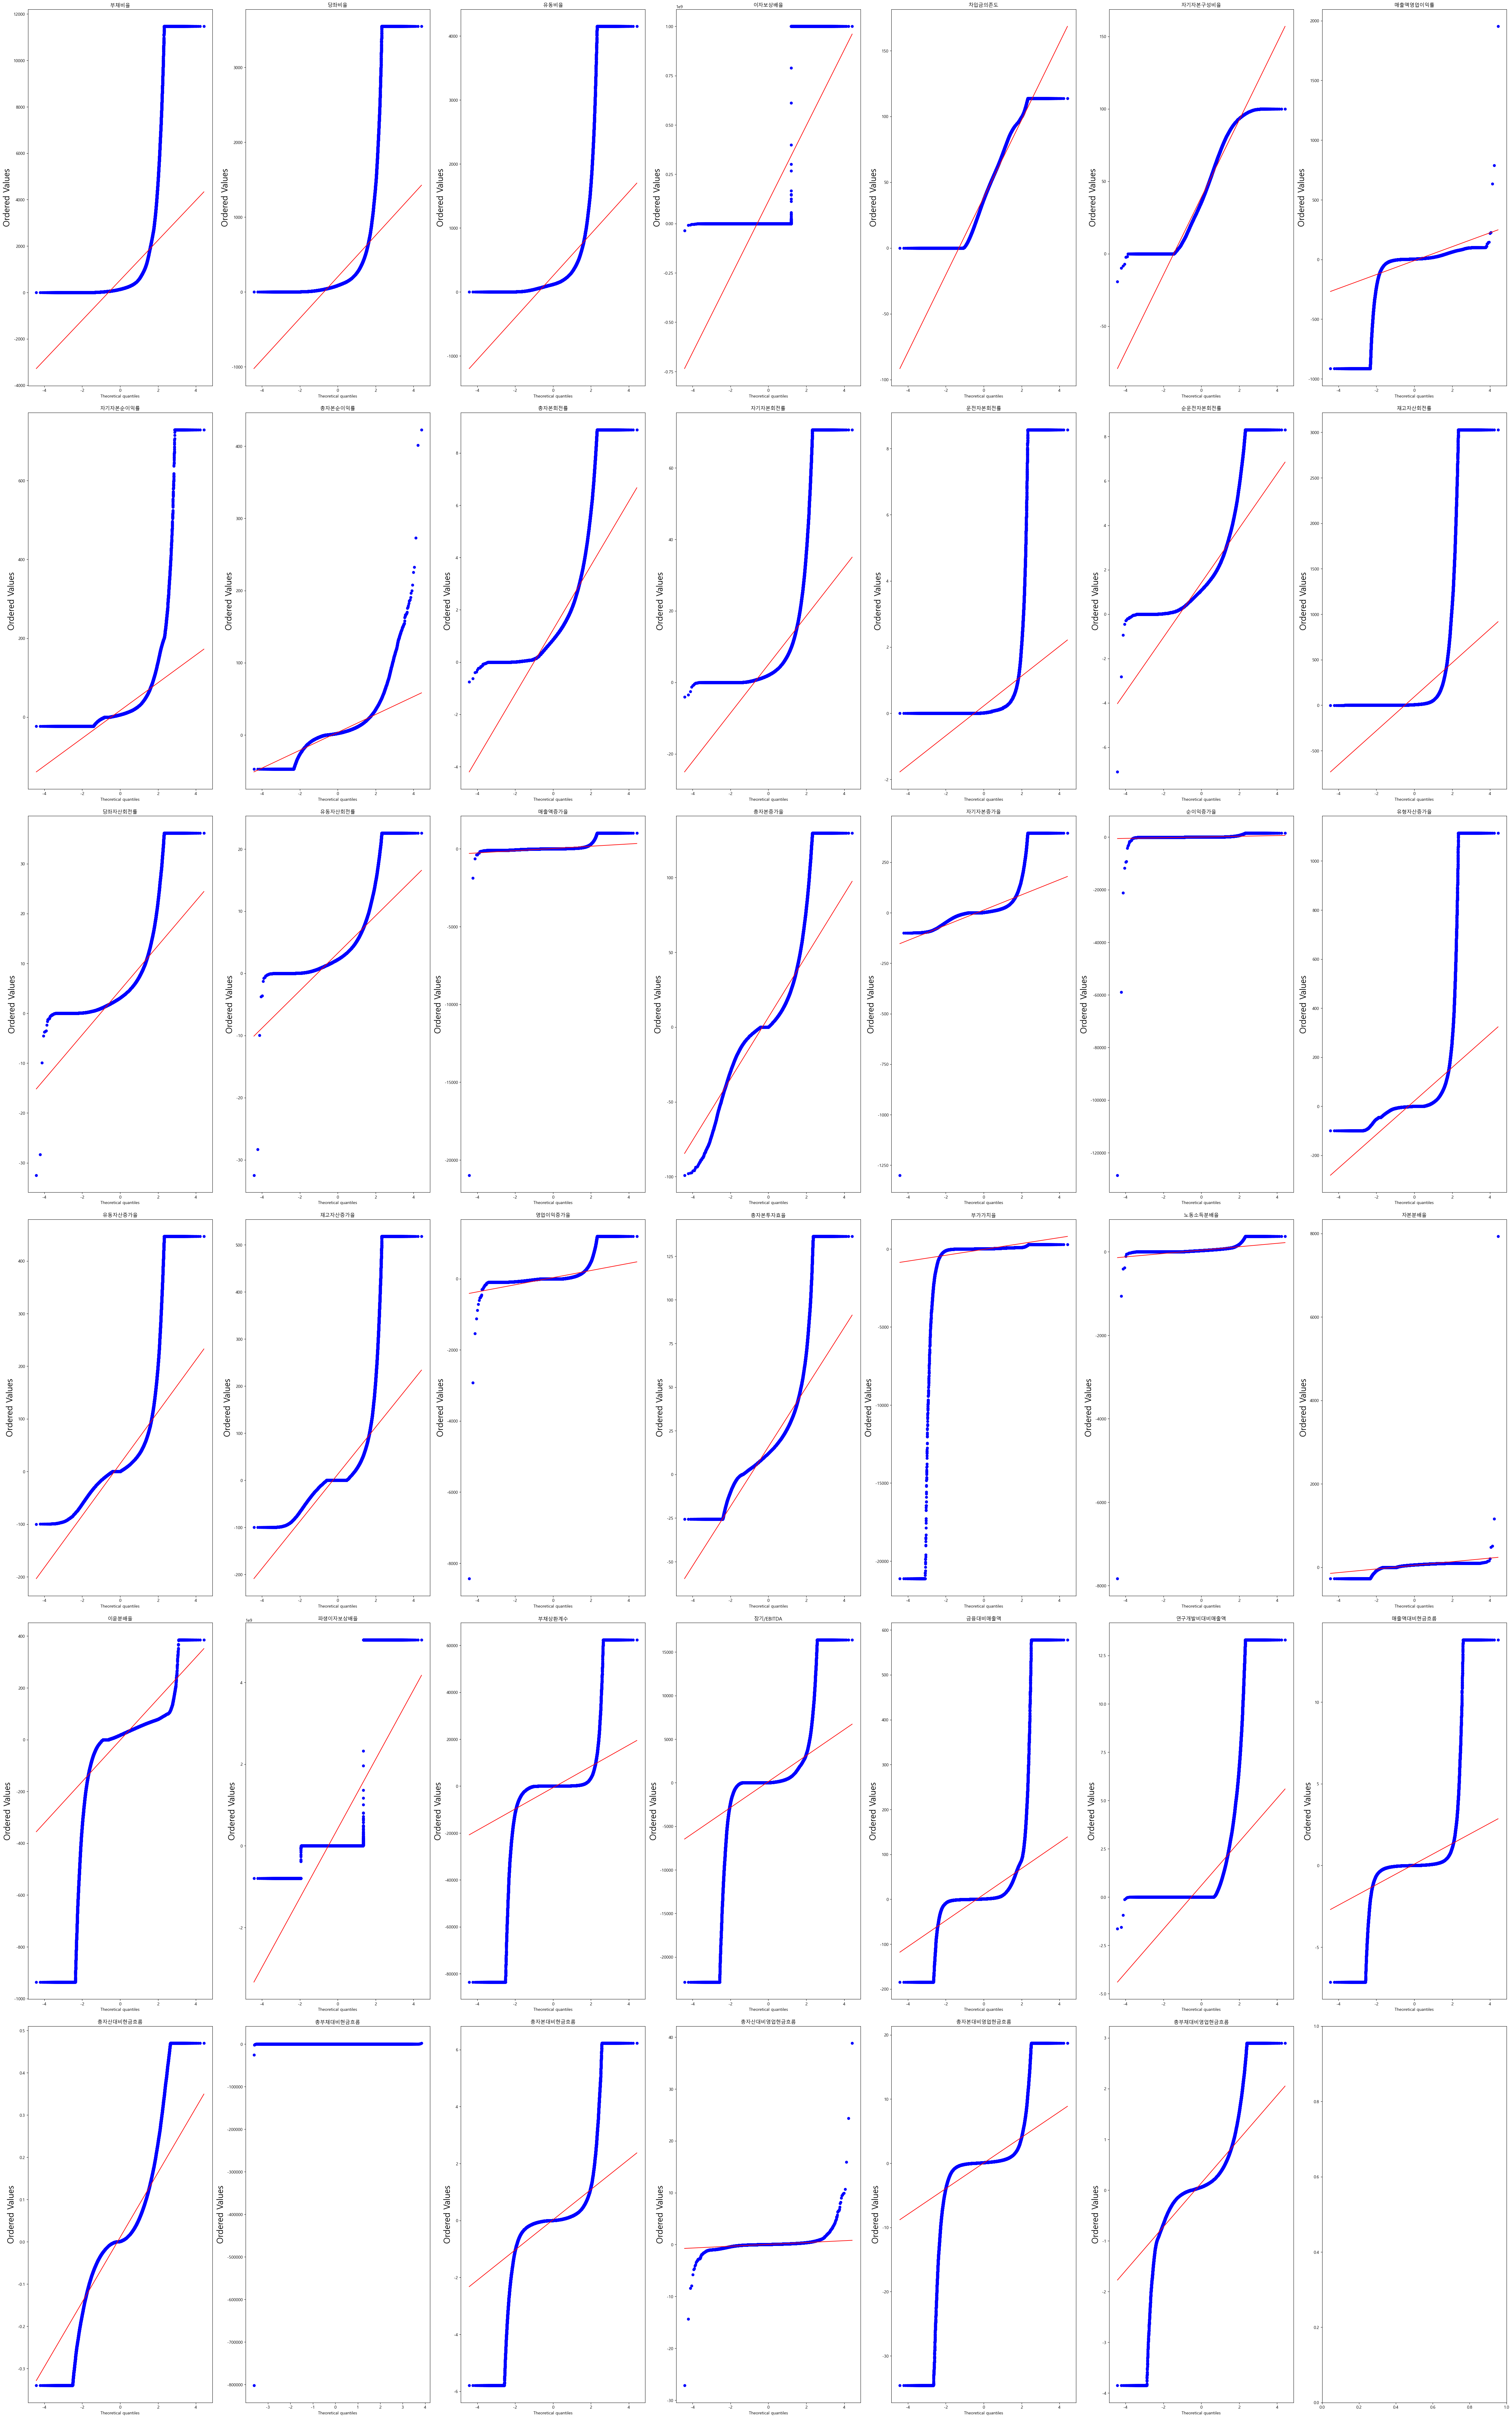

In [457]:
from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            ax.set_title(col, fontsize=20)  # 글씨 크기 설정
            ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(X_train[columns],7,6)

---

In [453]:
# df.sort_values(by='부채비율',ascending=False)[['부채비율','자본금(천원)','부채총계(천원)', '자본총계(천원)','t-1감사의견코드']]

In [454]:
# from scipy.stats.mstats import winsorize

# df['부채비율'] = winsorize(df['부채비율'], limits= (0.008, 0.002))
# df['당좌비율'] = winsorize(df['당좌비율'], limits= (0.006, 0.004))
# df['총자본순이익률'] = winsorize(df['총자본순이익률'], limits= (0.005, 0.005))
# df['자기자본순이익률'] = winsorize(df['자기자본순이익률'], limits= (0.006, 0.004))
# df['매출원가대매출액비율'] = winsorize(df['매출원가대매출액비율'], limits= (0, 0.01))
# df['영업비용대영업수익비율'] = winsorize(df['영업비용대영업수익비율'], limits= (0.005, 0.005))
# df['기업순이익률'] = winsorize(df['기업순이익률'], limits= (0.005, 0.005))
# df['금융비용대총비용비율'] = winsorize(df['금융비용대총비용비율'], limits= (0.005, 0.005))
# df['이자부담률'] = winsorize(df['이자부담률'], limits= (0.005, 0.005))
# df['1주당매출액'] = winsorize(df['1주당매출액'], limits= (0, 0.01))
# df['1주당순이익'] = winsorize(df['1주당순이익'], limits= (0.004, 0.006))
# df['1주당CASHFLOW'] = winsorize(df['1주당CASHFLOW'], limits= (0.002, 0.008))
# df['1주당정상영업이익'] = winsorize(df['1주당정상영업이익'], limits= (0.002, 0.008))

In [455]:
df.columns

Index(['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '자본금(천원)', '영업손익(천원)', '연구개발비(천원)', '파생이자보상배율',
       '부채상환계수', '장기/EBITDA', '금융대비매출액', '전체현금흐름(천원)', '연구개발비대비매출액',
       '매출액대비현금흐름', '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름',
       '총자본대비영업현금흐름', '총부채대비영업현금흐름', '기업수명주기', 't-1감사의견코드'],
      dtype='object')